<a href="https://colab.research.google.com/github/tahamsi/Computer-Vision/blob/main/Object_Tracking_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/Computer-Vision)

# What is Object Tracking

Source: https://github.com/roboflow/notebooks

Object tracking is a field within computer vision that involves the process of locating and following a specific object or multiple objects in a sequence of frames within a video. The primary goal of object tracking is to identify and trace the movement of objects over time as they move within a video or a series of consecutive frames.

The process of object tracking typically involves the following steps:


1.   Detection: Initially, an object detector or segmentation algorithm identifies and localizes objects within the first frame of the video sequence.

2.   Initialization: Once the object is detected in the first frame, a bounding box or a specific region of interest around the object is defined, and its characteristics (such as appearance features, color, shape, or motion) are extracted to create a representation.
3.   Tracking: Using the defined characteristics, the tracker continuously predicts the object's position or state in subsequent frames by updating and adjusting the initial representation. This is done by estimating the object's location, size, orientation, and other relevant attributes.
3.   Updating: As the object moves, changes direction, or experiences occlusion, the tracking algorithm adapts to these variations, maintaining the object's trajectory and characteristics across frames.

Object tracking finds extensive applications in various domains, including:
*   Surveillance: Tracking individuals or objects in security and monitoring systems.
*   Autonomous Vehicles: Monitoring and following vehicles, pedestrians, or obstacles in the vehicle's path.
*   Augmented Reality: Anchoring digital information to moving objects in real-time.
*   Human-Computer Interaction: Tracking human gestures or movements for interactive interfaces.


*   Sports Analysis: Analyzing the movement and positioning of athletes during games or training sessions.

Different algorithms and techniques are employed in object tracking, such as correlation filters, Kalman filters, deep learning-based approaches (e.g., CNNs), and combinations of these methods to address challenges like occlusion, varying lighting conditions, scale changes, and object appearance alterations. The goal is to maintain accurate and consistent tracking of objects throughout the video sequence despite these challenges.

*In this tutorial we use Yolov8 to detect and track objects on videos.*
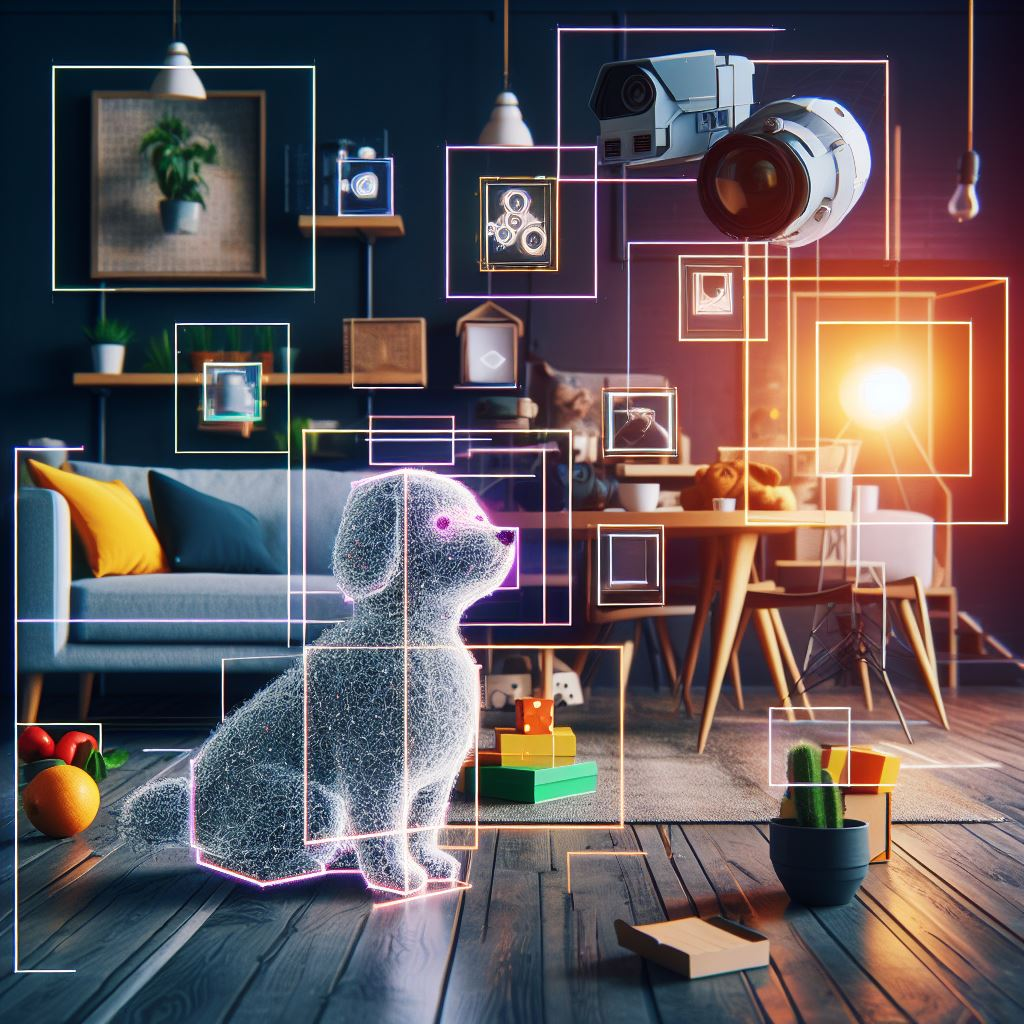


#Prepare the environment
## Make sure that you have access to GPU

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

## Install YOLOv8

YOLOv8 can be installed in two methods: either directly from the source or through pip. This version marks the first iteration of YOLO to have an official package available for installation.

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Download video

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/file/d/1JiWH10vGajXfWNL7xjoQchcurJ3Rn3tz/view?usp=sharing' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JiWH10vGajXfWNL7xjoQchcurJ3Rn3tz" -O people.mp4 && rm -rf /tmp/cookies.txt
SOURCE_VIDEO_PATH = f"{HOME}/people.mp4"

Note: Feel free to upload a file that captures your interest. You can accomplish this by either sharing its URL or directly loading it into Colab from your local machine, as depicted in the figure below.

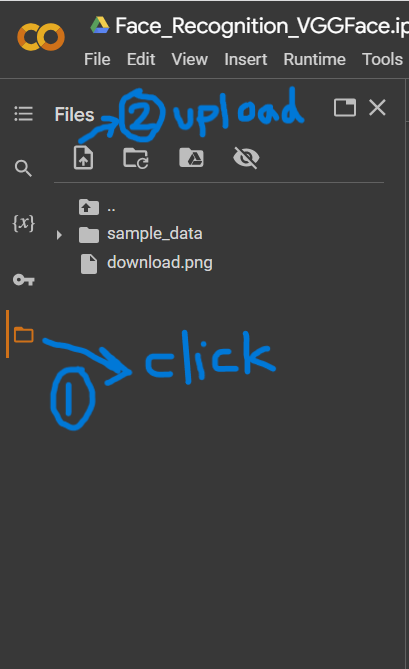

---
#1) Tracking objects in a video using Yolo.track()

Object tracking within video analytics stands as a pivotal task, not only discerning object location and classification within frames but also preserving unique identification for each detected object's progression throughout the video. Its applications span a broad spectrum, encompassing areas from surveillance and security to real-time sports analytics.

##Why Opt for Ultralytics YOLO in Object Tracking?

Ultralytics trackers produce outputs akin to standard object detection but offer an additional benefit of assigning object IDs. This distinctive feature simplifies the tracking of objects in video streams, facilitating subsequent analytical procedures. Consider choosing Ultralytics YOLO for your object tracking requirements for the following reasons:

*   Efficiency: Enables real-time processing of video streams while upholding accuracy standards.
*   Flexibility: Supports diverse tracking algorithms and configurations, adapting to various tracking needs.
*   User-Friendly: Offers a straightforward Python API and CLI options, ensuring swift integration and deployment.
*   Customization: Seamlessly integrates with custom-trained YOLO models, making it compatible with specific domain applications.

Source: https://docs.ultralytics.com/modes/track/

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Open the video file
cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

##Issues
*   Presence of undesired classes in the output.
*   Lack of output in video format.











#2) Tracking objects in a video using CLI

You can directly initiate a Yolov8 model via the CLI mode and download the resulting video from Colab.

In [ ]:
%cd
!yolo task = detect mode = predict model = yolov8x.pt conf = 0.25 source = {SOURCE_VIDEO_PATH}

In [ ]:
from google.colab import files
files.download('runs/detect/predict/people.avi')

##Issues
*   Presence of undesired classes in the output.
*   Lack of output in video format.
*   Absence of object tracking functionality.

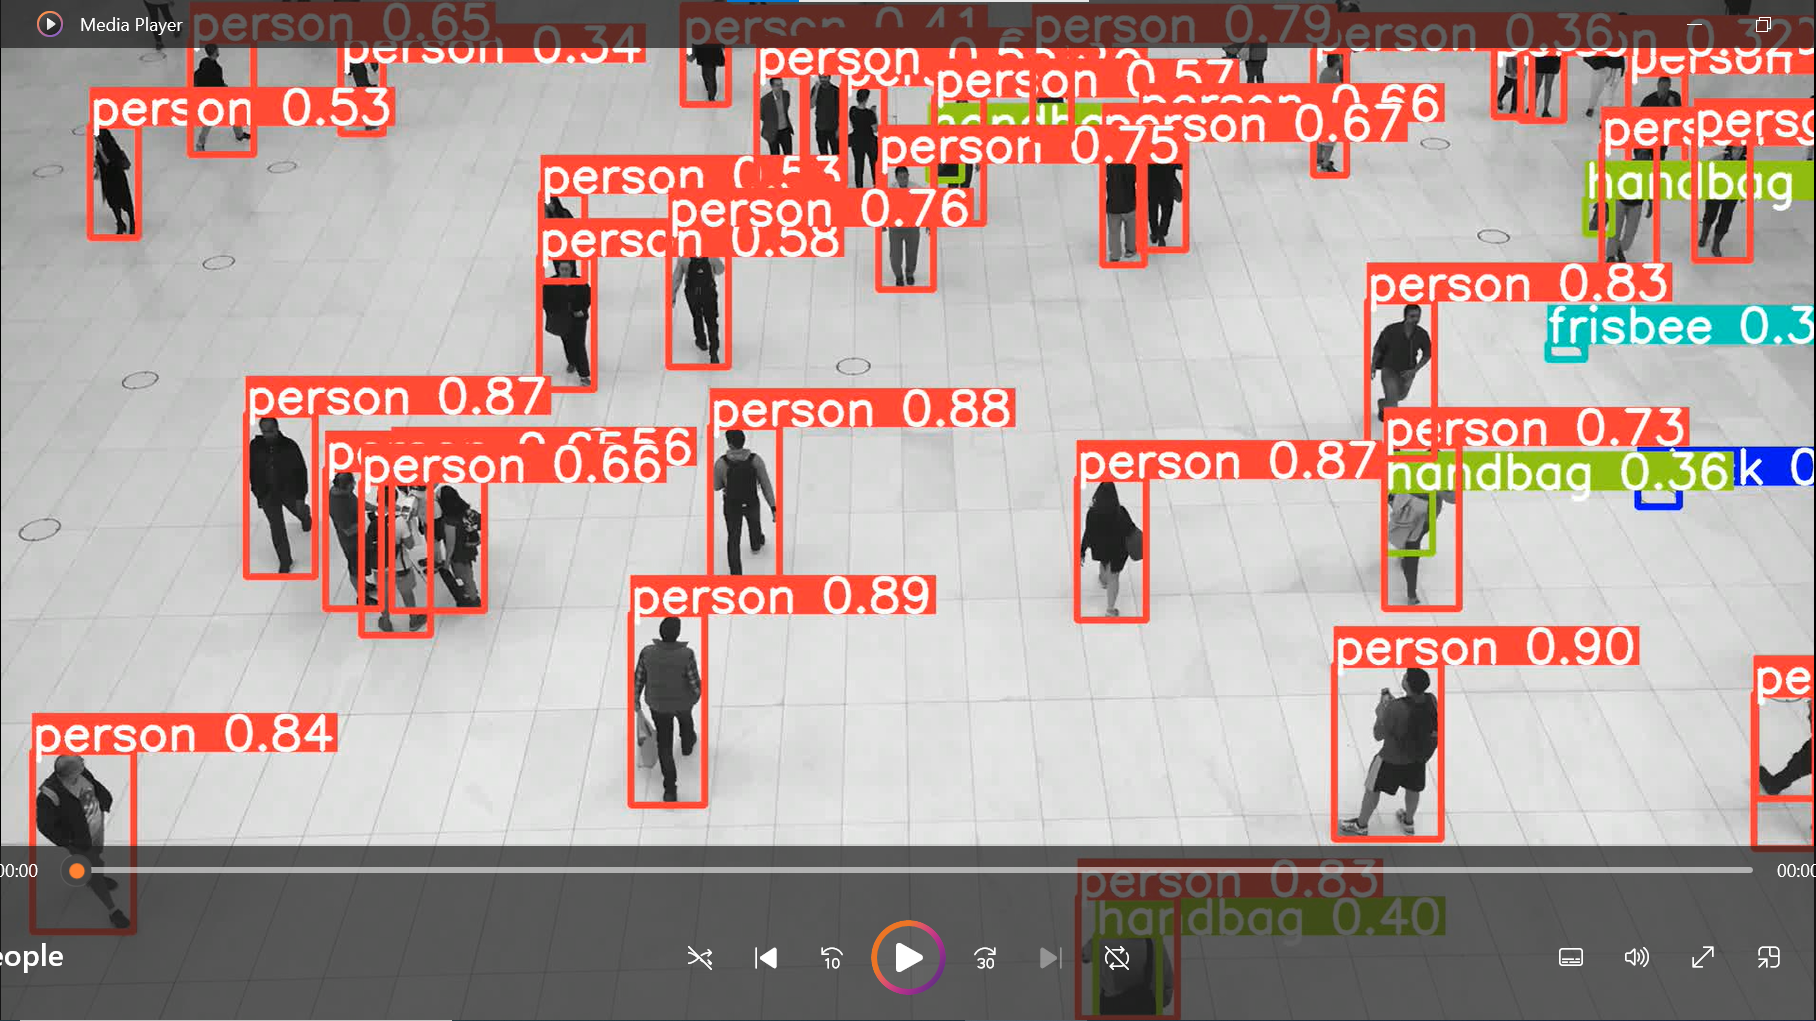

#3) Tracking objects in a video using yolo in python mode


To tackle the challenges encountered in prior methods, a comprehensive approach involves leveraging YOLO in Python mode for enhanced control and flexibility in object detection. Additionally, integrating ByteTrack, a robust object-tracking method, aids in accurately following objects across frames, ensuring continuity in video analysis. Moreover, incorporating Roboflow Supervision for video processing enhances the overall workflow, offering efficient management of video data for improved object detection and tracking outcomes.


## Install ByteTrack

[ByteTrack](https://github.com/ifzhang/ByteTrack) is a simple, fast and strong multi-object tracker. However, it needs to some tweaks to work with [YOLOv8](https://github.com/ultralytics/ultralytics).

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt
!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
!pip install -q loguru lap thop
from IPython import display
display.clear_output()
import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass

@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

## Install Roboflow Supervision

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

## Tracking utils

In this case, we have to manually match the bounding boxes coming from our model with those created by the tracker.

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

## Load pre-trained YOLOv8 model

In [ ]:
# settings
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

## Predict and annotate single frame

Predefined objects and the associated codes are as follow:
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

In [ ]:
CLASS_NAMES_DICT = model.model.names
# class_id of interest - person
CLASS_ID = [0]

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

## Predict and annotate whole video

In [ ]:
# settings
LINE_START = Point(50, 700)
LINE_END = Point(1750-50, 700)

TARGET_VIDEO_PATH = f"{HOME}/people-counting-result.mp4"

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2, text_thickness=2, text_scale=1)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)